NOTES [27/7/24]
1. data leakage (kebocoran data): the mixed information of target/test on train data but similar data will not be available when the model is used for prediction (always splitting first then preposs)
   https://www.kaggle.com/code/alexisbcook/data-leakage
   a. target leakage: occurs when your predictors include data that will not be available at the time you make predictions.
   b. train_test contamination: good validation scores model but poor on making decisions

2. "split the data X and y first then preprocess the data"
3. skipped steps
   a. encode all categorical columns except Nama Resolver
   b. correlation must on every columns but first encode the categorical datas
   c. feature selections based on the corr
4. outliers 
   a. di bawah 20% = droppable, above 20%= missing value removal
   b. trial and error for outlier using mean, interquartile, etc
5. data correlations
   a. spearman
   b. pearson
   c. the larger number r the strongest, the more clos to zero then the lowest
6. feature selection
   a. use the correlation and find the feature relations
7. accuracy improvement/ modelling scope
   https://www.geeksforgeeks.org/hyperparameter-tuning/
   a. optuna 
   b. randomiser
   c. gridsearchcv
8. try more than 1 model on same library
9. PCA= usually for big data
   

# Data Overview

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
#from imblearn.over_sampling import SMOTE

In [30]:
data= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\cleanedData.csv", sep=';')
data.head(5)

,ID Resolver,Nama Resolver,Grup Resolver,Durations,Total Project,Total Time,Usia,Kualifikasi,Lama Kerja,Kelas Keahlian
0,69,Febrian Hilmi Firdaus,DSO,5,10,3831,48,S2,13,Utama
1,4,Azhar Mashuri,DIP,0,51,3734,28,S1,24,Madya
2,74,Hayan .,DSO,0,6,2043,22,Lulus SMA,69,Madya
3,62,Villa Nanda,DIP,1,20,754,22,Lulus SMA,122,Muda
4,41,Ghazi Muwaffaq,DSO,52,5,7052,24,Lulus SMA,135,Utama


In [31]:
#removing unwanted signs
data['Nama Resolver'] = data['Nama Resolver'].str.replace('.', '', regex=False).str.strip()
data['Nama Resolver'] = data['Nama Resolver'].str.replace('-', '', regex=False).str.strip()
data.head(5)

,ID Resolver,Nama Resolver,Grup Resolver,Durations,Total Project,Total Time,Usia,Kualifikasi,Lama Kerja,Kelas Keahlian
0,69,Febrian Hilmi Firdaus,DSO,5,10,3831,48,S2,13,Utama
1,4,Azhar Mashuri,DIP,0,51,3734,28,S1,24,Madya
2,74,Hayan,DSO,0,6,2043,22,Lulus SMA,69,Madya
3,62,Villa Nanda,DIP,1,20,754,22,Lulus SMA,122,Muda
4,41,Ghazi Muwaffaq,DSO,52,5,7052,24,Lulus SMA,135,Utama


# Data Categorical

In [32]:
#objt(str) to category
data['Grup Resolver'] = data['Grup Resolver'].astype('category')
data['Nama Resolver'] = data['Nama Resolver'].astype('category')
data['Kualifikasi'] = data['Kualifikasi'].astype('category')
data['Kelas Keahlian'] = data['Kelas Keahlian'].astype('category')

In [33]:
#encoding with LabelEncoder
encoder= LabelEncoder()

# Data Corr [bf feature selection]

In [34]:
#encoding columns for Data Corr
data['Kualifikasi_enc']= encoder.fit_transform(data['Kualifikasi'])
data['KelasKeahlian_enc']= encoder.fit_transform(data['Kelas Keahlian'])
data['GrupResolver_enc']= encoder.fit_transform(data['Grup Resolver'])
data['NamaResolver_enc']= encoder.fit_transform(data['Nama Resolver'])
data['ID Resolver_enc']= encoder.fit_transform(data['ID Resolver'])
data_corr= data.drop(['Kualifikasi', 'Kelas Keahlian', 'Grup Resolver', 'Nama Resolver', 'ID Resolver'], axis=1)
data_corr.head()

,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc,KelasKeahlian_enc,GrupResolver_enc,NamaResolver_enc,ID Resolver_enc
0,5,10,3831,48,13,2,2,6,20,25
1,0,51,3734,28,24,1,0,3,8,1
2,0,6,2043,22,69,0,0,6,23,28
3,1,20,754,22,122,0,1,3,41,22
4,52,5,7052,24,135,0,2,6,21,15


In [37]:
#data corr bf feature selection
pearson_corr = data_corr.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()

TypeError: 'DataFrame' object is not callable

<Figure size 1200x1000 with 0 Axes>

In [9]:
#encoding columns
data['Kualifikasi_enc']= encoder.fit_transform(data['Kualifikasi'])
data= data.drop(['Kualifikasi'], axis=1)
data.head()

,ID Resolver,Nama Resolver,Grup Resolver,Durations,Total Project,Total Time,Usia,Lama Kerja,Kelas Keahlian,Kualifikasi_enc
0,69,Febrian Hilmi Firdaus,DSO,5,10,3831,48,13,Utama,2
1,4,Azhar Mashuri,DIP,0,51,3734,28,24,Madya,1
2,74,Hayan,DSO,0,6,2043,22,69,Madya,0
3,62,Villa Nanda,DIP,1,20,754,22,122,Muda,0
4,41,Ghazi Muwaffaq,DSO,52,5,7052,24,135,Utama,0


# Data Feature Selection

In [10]:
#feature selection
X= data.drop(['Nama Resolver', 'Grup Resolver', 'Kelas Keahlian', 'ID Resolver'], axis=1) #value count dari kelas keahlian
y= data['Kelas Keahlian']

In [15]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

In [16]:
#encoding with LabelEncoder
#encoder= LabelEncoder()

In [17]:
#encoding columns
#X_train['Kualifikasi_enc']= encoder.fit_transform(X_train['Kualifikasi'])
#X_train= X_train.drop(['Kualifikasi'], axis=1)
#X_train.head()

# Data Outlier

di bawah 20% = droppable
above 20%= missing value removal, if non then u're safe
trial and error for outlier using mean, interquartile

In [18]:
#standarization
columns_to_standardize = ['Durations', 'Total Project', 'Total Time', 'Usia', 'Lama Kerja', 'Kualifikasi_enc']
X_train_awal= pd.DataFrame(X_train)
# Standardize the specified columns and detect outliers
for column in columns_to_standardize:
    mean = X_train[column].mean()
    std = X_train[column].std()
    X_train[column] = (X_train[column] - mean) / std
    #X_train[column + '_is_outlier'] = np.abs(X_train[column + '_zscore']) > 3 

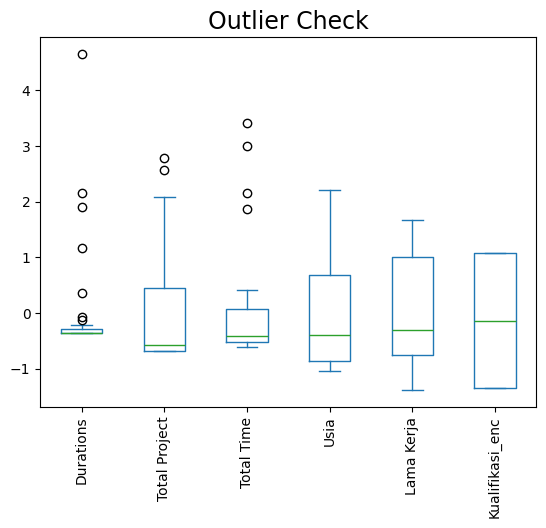

In [19]:
#outlier
X_train[['Durations', 'Total Project', 'Total Time', 'Usia', 'Lama Kerja', 'Kualifikasi_enc']].plot(kind= 'box')
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()


trial and error for outlier using mean, interquartile, 


# Data Corr

1. trial error on these:pearson, spearman
2. the larger number r the strongest, the more clos to zero then the lowest

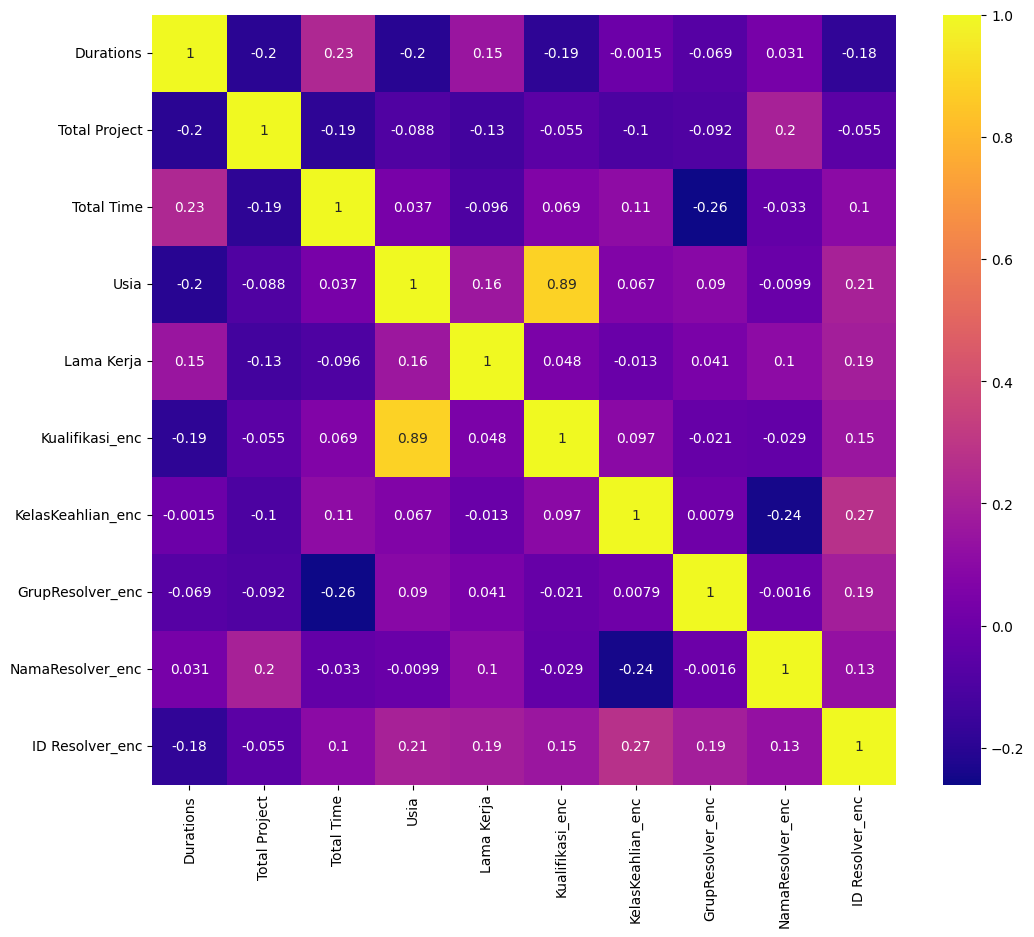

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_corr.corr(), annot=True, cmap='plasma') #plus target
plt.show()

# Data Model

In [22]:
model= DecisionTreeClassifier()

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
X_test

,Durations,Total Project,Total Time,Usia,Lama Kerja,Kualifikasi_enc
25,0,23,1,22,211,0
22,3,9,407,34,215,1
28,3,3,2352,54,341,2
4,52,5,7052,24,135,0
10,7,4,36,29,46,1
31,1066,11,14329,22,192,0
29,7,6,8064,41,2,2
11,45,3,20700,52,143,2
20,7,7,3711,23,33,0
32,1,2,966,24,338,0


In [33]:
prediction= model.predict(X_test)
prediction

array(['Utama', 'Muda', 'Muda', 'Muda', 'Muda', 'Muda', 'Muda', 'Muda',
       'Muda', 'Muda'], dtype=object)

In [34]:
y_test

25    Utama
22    Madya
28    Madya
4     Utama
10     Muda
31     Muda
29     Muda
11     Muda
20     Muda
32    Madya
Name: Kelas Keahlian, dtype: category
Categories (3, object): ['Madya', 'Muda', 'Utama']

In [35]:
model.score(X_test, y_test)

0.6

# Data Eval

In [36]:
#applying on confusion matrix
confusion_matrix(y_test, prediction)

array([[0, 3, 0],
       [0, 5, 0],
       [0, 1, 1]], dtype=int64)

In [38]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       Madya       0.00      0.00      0.00         3
        Muda       0.56      1.00      0.71         5
       Utama       1.00      0.50      0.67         2

    accuracy                           0.60        10
   macro avg       0.52      0.50      0.46        10
weighted avg       0.48      0.60      0.49        10



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,